# Lab 4 key

Solutions to Math 465 lab 4

In [2]:
from linear_fitting_functions import *

# Problem 1

In [3]:
t1 = np.array([7,14,21,28,35,42])
P1 = np.array([8,41,133,250,280,297])

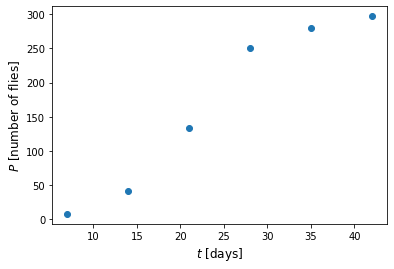

In [5]:
plt.plot(t1, P1, 'o')
plt.xlabel(r'$t$ [days]', fontsize=12);
plt.ylabel(r'$P$ [number of flies]', fontsize=12);

## Part (a)

$$ P(t) = c_1 t $$

In [65]:
n1pred = 50
t1pred = np.linspace(0,42,num=n1pred)

In [14]:
print(300/40)

7.5


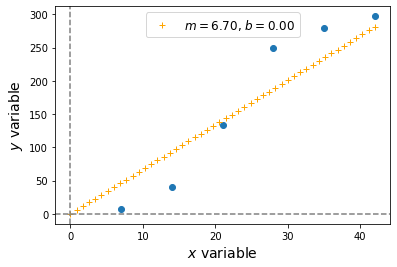

In [16]:
visual_fit_linear(t1, P1, 6.7, 0, t1pred)

             x value             residual
              7.0000              40.5450
             14.0000              56.0900
             21.0000              12.6350
             28.0000              55.8200
             35.0000              37.2750
             42.0000               5.7300
Largest absolute error is r = 56.09 
 It occurs when x =  14.0000


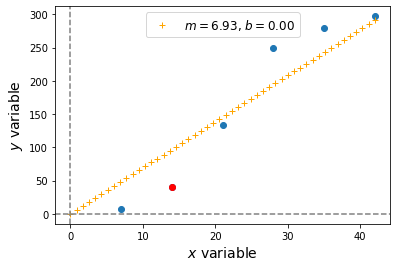

In [34]:
chebyshev_fit_linear(t1, P1, 6.93, 0, t1pred)

That was the best value of $r$ I could get by experimenting

Performing linear program optimization with bounds:
       r =          0     433.50
       m =       4.64       9.22
       b =      -0.00       0.00
After 19 iterations...
The optimization was successful! Here are the values it found:
       r =    56.0000
       m =     6.9286
       b =    -0.0000
Check: Largest absolute error is r = 56.00 
 It occurs when x =  14.0000


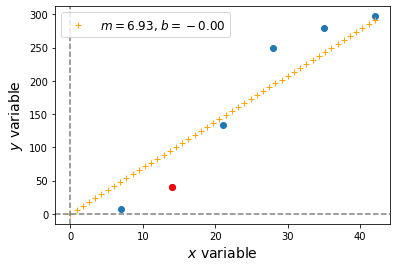

In [35]:
chebyshev_linprog_fit_linear(t1, P1, t1pred, 6.93, 0)

Actually, it was pretty close to the optimal value, so not bad!

Check for discussion of fit using the different methods.

## Part (b)

$$ P(t) = a e^{bt} $$

$$ \ln P = \ln a + bt $$

Slope of line will be $b$ and the intercept will be $\ln a$

In [36]:
P1_log = np.log(P1)

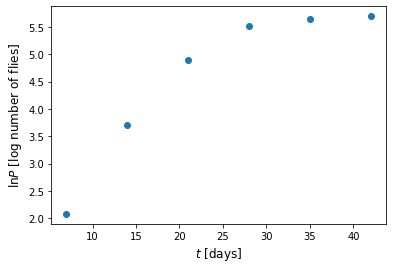

In [37]:
plt.plot(t1, P1_log, 'o')
plt.xlabel(r'$t$ [days]', fontsize=12);
plt.ylabel(r'$\ln P$ [log number of flies]', fontsize=12);

This doesn't really look linear, so I doubt the fit will be very good no matter what we do.

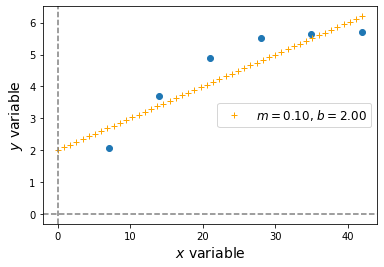

In [48]:
visual_fit_linear(t1, P1_log, 0.1, 2, t1pred)

             x value             residual
              7.0000               0.7206
             14.0000               0.2136
             21.0000               0.6903
             28.0000               0.6215
             35.0000               0.0348
             42.0000               0.6063
Largest absolute error is r = 0.72 
 It occurs when x =  7.0000


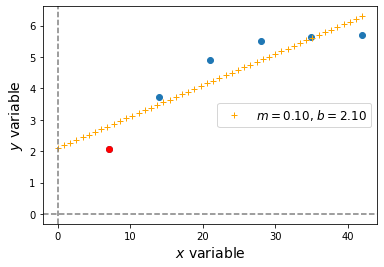

In [59]:
chebyshev_fit_linear(t1, P1_log, 0.1, 2.1, t1pred)

Performing linear program optimization with bounds:
       r =          0       5.42
       m =       0.07       0.13
       b =       1.41       2.79
After 20 iterations...
The optimization was successful! Here are the values it found:
       r =     0.8933
       m =     0.1233
       b =     1.4070
Check: Largest absolute error is r = 0.89 
 It occurs when x =  42.0000


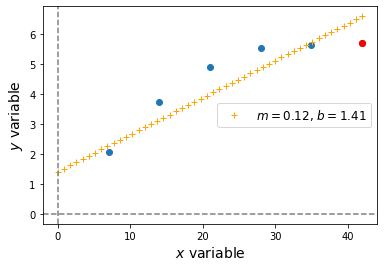

In [64]:
chebyshev_linprog_fit_linear(t1, P1_log, t1pred, 0.1, 2.1)

Nope, not as good this time. It actually ended up doing worse.

Let's use $m=0.1$, $b=2.1$ as the Chebyshev result and transform back to make the exponential prediction

In [68]:
P1bpred = np.empty(n1pred)
A1b = np.exp(2.1)
b1b = 0.1
for i in range(0,n1pred):
    P1bpred[i] = A1b * np.exp(t1pred[i]*b1b)

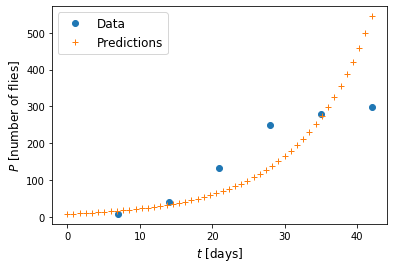

In [69]:
plt.plot(t1, P1, 'o', label='Data');
plt.plot(t1pred, P1bpred, '+', label='Predictions')
plt.xlabel(r'$t$ [days]', fontsize=12);
plt.ylabel(r'$P$ [number of flies]', fontsize=12);
plt.legend(fontsize=12);

An exponential doesn't work very well for this data set, but here is the optimal prediction using the Chebyshev's method result.

# Problem 2

## Part (a)

Write out the linear program to minimize the largest deviation between the model $ax+b$ and the dataset

| x | y |
|---|---|
|1.0|3.6|
|2.3|3.0|
|3.7|3.2|
|4.2|5.1|
|6.1|5.3|
|7.0|6.8|

Let the absolute error for the $i$th data point be

$$ |r_i| = |y_i - a x_i - b| $$

where $(x_i,y_i)$ is the $i$ data point in the table above. Let $r$ be the largest absolute error out of the $r_i$'s. That means that

$$ |r_i| \leq r $$

which, written out more fully means

$$ -r \leq r_i \leq r\;. $$

There are two inequalities for each data point, $-r \leq r_i$ and $r_i \leq r$. Therefore

$$ r + r_i \geq 0 $$
$$ r - r_i \geq 0 $$

and we will have 12 inequalities for the data set above.

## The inequalities that form the linear program

$$ r + 3.6 - a - b \geq 0 $$
$$ r - 3.6 + a + b \geq 0 $$
$$ r + 3.0 - 2.3a - b \geq 0 $$
$$ r - 3.0 + 2.3a + b \geq 0 $$
$$ r + 3.2 - 3.7a - b \geq 0 $$
$$ r - 3.2 + 3.7a + b \geq 0 $$
$$ r + 5.1 - 4.2a - b \geq 0 $$
$$ r - 5.1 + 4.2a + b \geq 0 $$
$$ r + 5.3 - 6.1a - b \geq 0 $$
$$ r - 5.3 + 6.1a + b \geq 0 $$
$$ r + 6.8 - 7a - b \geq 0 $$
$$ r - 6.8 + 7a + b \geq 0 $$

The idea is to find the values of $(r,a,b)$ that minimize $r$ and satisfy all 12 inequalities. 

## Part (b)

Now use the two chebyshev functions to find the values of $a$ and $b$ that minimize $r$.

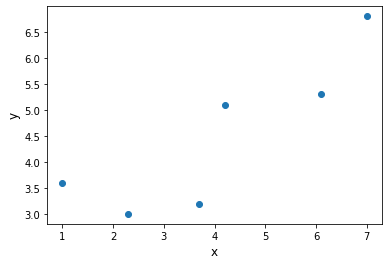

In [70]:
x2 = np.array([1.0, 2.3, 3.7, 4.2, 6.1, 7.0])
y2 = np.array([3.6, 3.0, 3.2, 5.1, 5.3, 6.8])
plt.plot(x2, y2, 'o');
plt.xlabel('x', fontsize=12);
plt.ylabel('y', fontsize=12);

In [71]:
npred2 = 50
xpred2 = np.linspace(0,8,num=npred2)

             x value             residual
              1.0000               0.8200
              2.3000               0.4430
              3.7000               0.9570
              4.2000               0.6880
              6.1000               0.0810
              7.0000               0.9600
Largest absolute error is r = 0.96 
 It occurs when x =  7.0000


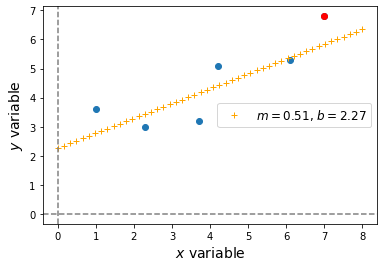

In [87]:
chebyshev_fit_linear(x2, y2,0.51,2.27,xpred2)

The best I was able to find was $a=0.51$ and $b=2.27$ so that $r=0.96$. Let's see what happens when we solve the linear program starting at these guess points.

Performing linear program optimization with bounds:
       r =          0       5.70
       m =       0.34       0.68
       b =       1.52       3.02
After 18 iterations...
The optimization was successful! Here are the values it found:
       r =     0.9200
       m =     0.5333
       b =     2.1467
Check: Largest absolute error is r = 0.92 
 It occurs when x =  7.0000


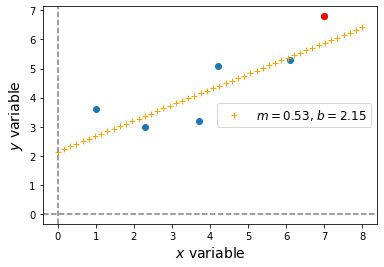

In [88]:
chebyshev_linprog_fit_linear(x2, y2, xpred2, 0.51, 2.27)

It was able to do better than me this time. The result is $r=0.92$ for the smallest deviation. The slope $a=0.5333$ and $b=2.1467$.

# Problem 3

Kepler's third law data and fitting a power-law model using least-squares.

In [89]:
R3 = np.array([57.9, 108.2, 149.6, 227.9, 778.1, 1428.2, 2837.9, 4488.9])
T3 = np.array([88, 225, 365, 687, 4329, 10753, 30660, 60150])

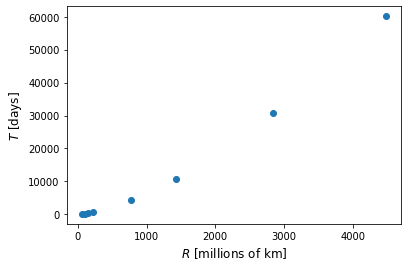

In [90]:
plt.plot(R3, T3, 'o')
plt.xlabel(r'$R$ [millions of km]', fontsize=12);
plt.ylabel(r'$T$ [days]', fontsize=12);

Using a power-law model

$$ T(R) = CR^a $$

Let's linearize so that

$$ \ln T = \ln C + a \ln R $$

If we then plot $\ln T$ vs. $\ln R$, the slope will be the power $a$ and the intercept the value of $\ln C$.

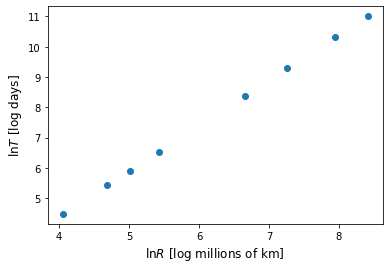

In [91]:
lnR3 = np.log(R3)
lnT3 = np.log(T3)
plt.plot(lnR3, lnT3, 'o')
plt.xlabel(r'$\ln R$ [log millions of km]', fontsize=12);
plt.ylabel(r'$\ln T$ [log days]', fontsize=12);

In [92]:
lnR3pred = np.linspace(3.75, 9, num=50)

             x value     residual squared
              4.0587               0.0001
              4.6840               0.0001
              5.0080               0.0001
              5.4289               0.0001
              6.6569               0.0001
              7.2642               0.0002
              7.9508               0.0000
              8.4094               0.0001
The sum of squared deviations is 0.00
And in case you need to know...
The largest absolute error is r = 0.01 
 It occurs when x =  7.2642


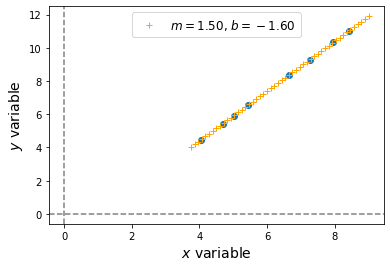

In [99]:
least_squares_fit_linear(lnR3, lnT3, 1.5, -1.6, lnR3pred)

After 3 iterations...
The optimization was successful! Here are the values it found:
       m =     1.5015
       b =    -1.6184
             x value     residual squared
              4.0587               0.0000
              4.6840               0.0000
              5.0080               0.0000
              5.4289               0.0000
              6.6569               0.0000
              7.2642               0.0000
              7.9508               0.0001
              8.4094               0.0000
The sum of squared deviations is 0.0002
And in case you need to know...
The largest absolute error is r = 0.0112 
 It occurs when x =  7.9508


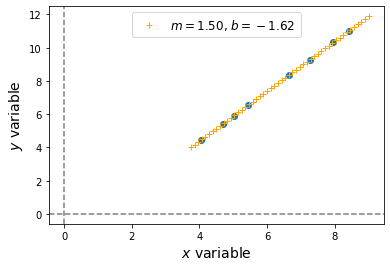

In [100]:
least_squares_optimizer_fit_linear(lnR3, lnT3, 1.5, -1.6, lnR3pred)

I'll use the optimizer values but you could use either your numerical or optimized values. That means that

$$ a = 1.5015$$
$$ \ln C = -1.6184$$
$$ C = e^{-1.6184}$$

In [101]:
C3 = np.exp(-1.6184)
a3 = 1.5015

In [103]:
n3pred = 50
R3pred = np.linspace(0,5000,num=n3pred)
T3pred = np.empty(n3pred)
for i in range(0, n3pred):
    T3pred[i] = C3 * R3pred[i]**a3

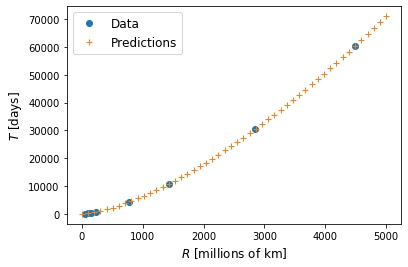

In [104]:
plt.plot(R3, T3, 'o', label='Data')
plt.plot(R3pred, T3pred, '+', label='Predictions')
plt.xlabel(r'$R$ [millions of km]', fontsize=12);
plt.ylabel(r'$T$ [days]', fontsize=12);
plt.legend(fontsize=12);

Looks really good! The curve pretty much exactly follows the data.